In [1]:
from DSGRN import *
import CMGDB

import numpy as np
import time
import math
import csv

In [2]:
def ComputeMorseGraph(digraph):
    morse_decomp = MorseDecomposition(digraph)
    num_nodes = morse_decomp.poset().size()
    mapping = defaultdict(int, { u : num_nodes - 1 - u for u in range(num_nodes) })
    scc_dag = DirectedAcyclicGraph()
    for u in range(num_nodes):
        for v in morse_decomp.poset().children(u):
            scc_dag.add_edge(mapping[u], mapping[v])
    return scc_dag, mapping, morse_decomp

def SaveMorseSets(scc_dag, mapping, morse_decomp, morse_graph, morse_fname):
    num_morse_sets = len(scc_dag.vertices())
    with open(morse_fname, 'w') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',')
        for n in range(num_morse_sets):
            node = mapping[n]
            morse_set = morse_decomp.morseset(n)
            for index in morse_set:
                morse_rect = morse_graph.phase_space_box(index) + [node]
                csv_writer.writerow(morse_rect)

In [3]:
# Leslie map with padding

# Define Leslie map
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

# Define box map for f
def F(rect):
    # return CMGDB.BoxMap(f, rect)
    return CMGDB.BoxMap(f, rect, padding=True)

In [4]:
phase_subdiv = 20
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [5]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 49.3 s, sys: 459 ms, total: 49.8 s
Wall time: 51.3 s


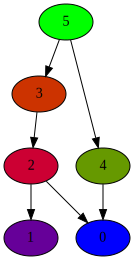

In [6]:
CMGDB.PlotMorseGraph(morse_graph)

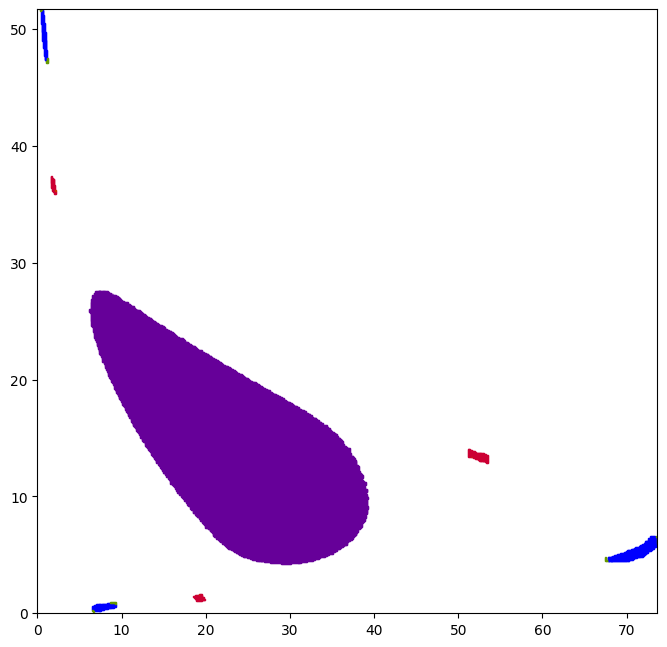

In [7]:
CMGDB.PlotMorseSets(morse_graph)

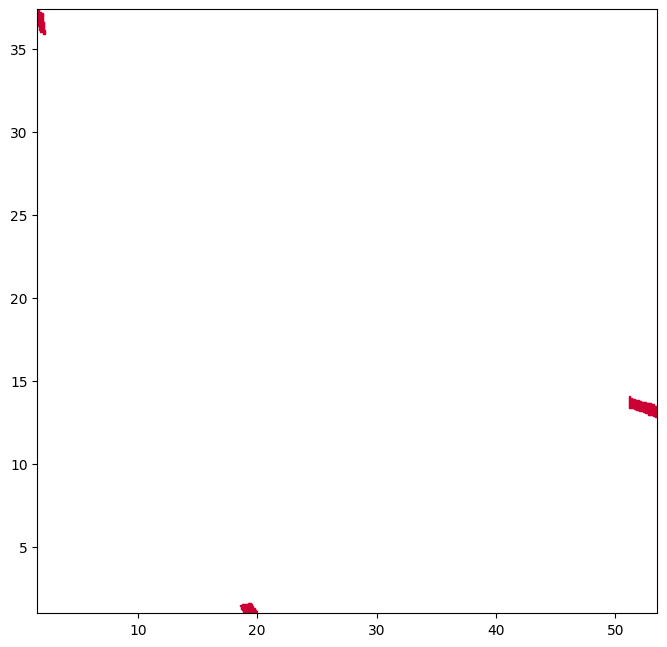

In [8]:
CMGDB.PlotMorseSets(morse_graph, morse_nodes=[2])

Get the geometry of a box in phase space.

In [9]:
morse_graph.phase_space_box(12)

[0.174783203125, 0.135720703125, 0.2626748046875, 0.2040810546875]

Construct a directed graph from map_graph. One can add edges to this digraph with `domain_graph.add_edge`.

In [10]:
# Get number of vertices
num_verts = map_graph.num_vertices()

# Construct digraph
domain_graph = Digraph()

# Set number of vertices
domain_graph.resize(num_verts)

for u in range(num_verts):
    for v in map_graph.adjacencies(u):
        domain_graph.add_edge(u, v)

In [11]:
# Compute Morse graph using this digraph
scc_dag, mapping, morse_decomp = ComputeMorseGraph(domain_graph)

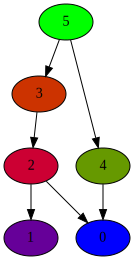

In [12]:
# Plot Morse graph
CMGDB.PlotMorseGraph(scc_dag)

In [13]:
# Save Morse sets to a file
morse_fname = 'morse_sets.csv'
    
SaveMorseSets(scc_dag, mapping, morse_decomp, morse_graph, morse_fname)

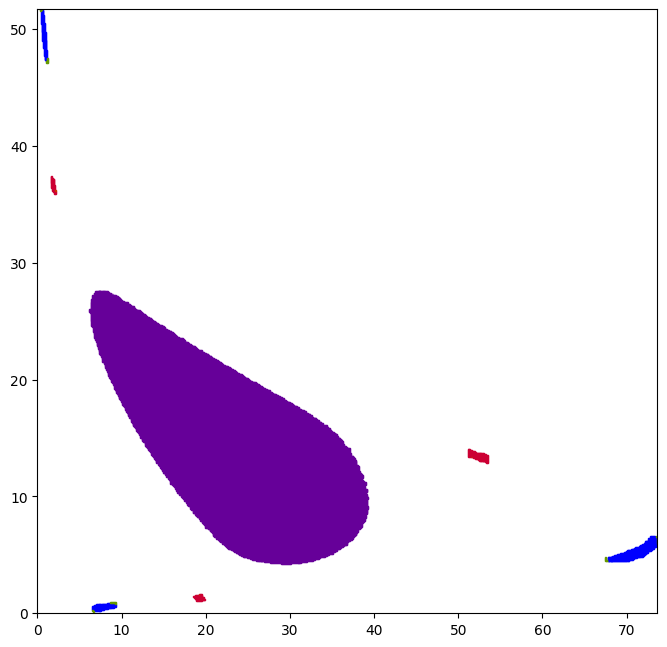

In [14]:
# Plot Morse sets
CMGDB.PlotMorseSets(morse_fname)

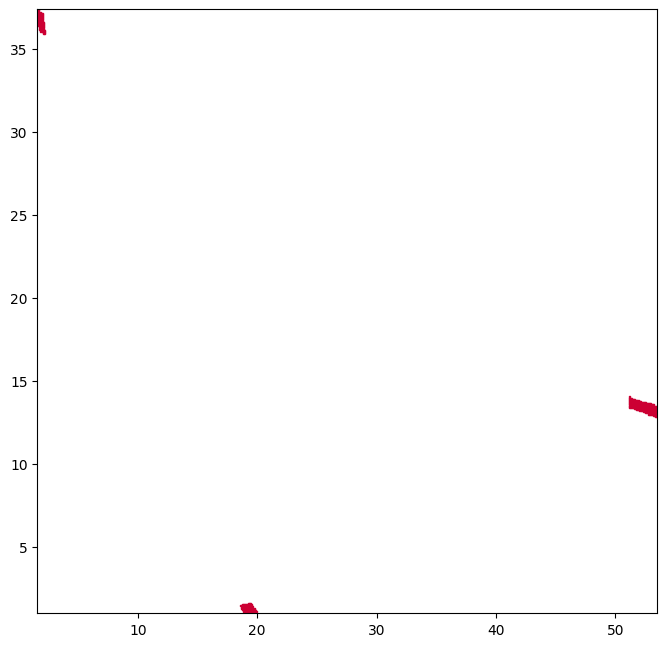

In [15]:
CMGDB.PlotMorseSets(morse_fname, morse_nodes=[2])